In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [16]:
def fmuseq(start, n=100, mu=1):
    fmu = lambda x: np.amin([x, 1-x]) * mu
    arr = np.zeros(n)
    arr[0] = start
    for i in range(n-1):
        arr[i+1] = fmu(arr[i])
    return arr

In [21]:
def evolution_set_mu(muv, count):
  data = np.array([fmuseq(x, n=count, mu=muv) for x in np.linspace(0, 1, count)])
  yticklocs = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]) * count/100
  fig, ax = plt.subplots()
  pos = ax.imshow(data)
  ax.set_ylabel("Starting value $x_0$")
  ax.set_yticks(yticklocs, np.divide(list(range(11)), 10))
  ax.set_xlabel("Steps")
  ax.set_title("Evolution of tent map sequence with $\mu=" + str(muv) + "$")
  bar = fig.colorbar(pos, ax=ax)
  bar.minorticks_on()
  # bar.set_label("Value")
  plt.savefig("./broken_floating_point.png")
  plt.show()
  return pos # alignment for later colorbars (yes this is jank but it's necessary)

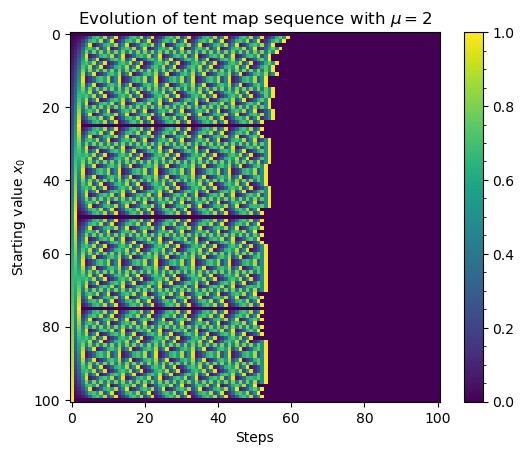

In [22]:
pos = evolution_set_mu(2, 101) # setting the future alignment in pos

MovieWriter ffmpeg unavailable; using Pillow instead.


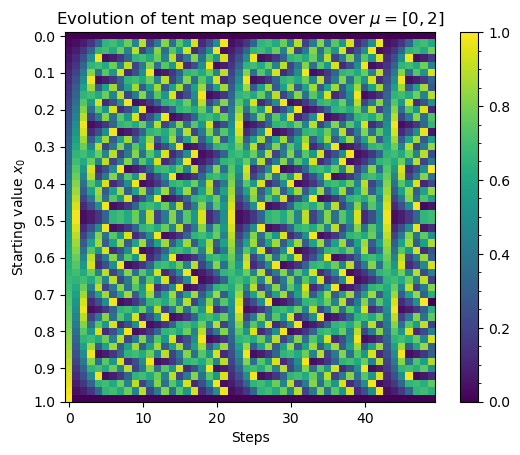

In [5]:
count = 50
ims = []
fig, ax = plt.subplots()

ax.set_xlabel("Steps")
ax.set_ylabel("Starting value $x_0$")
ax.set_title("Evolution of tent map sequence over $\mu=[0, 2]$")
yticklocs = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]) * count/100
ax.set_yticks(yticklocs, np.divide(list(range(11)), 10))
bar = fig.colorbar(pos, ax=ax)
bar.minorticks_on()

for muv in np.linspace(0, 2, 50):
    data = np.array([fmuseq(x, n=count, mu=muv) for x in np.linspace(0, 1, count)])
    im = ax.imshow(data)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=70, blit=True,
                                repeat_delay=1000)
ani.save("musetfig" + str(count) + ".gif")

In [6]:
list(range(100))[::10]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [7]:
fmuseq(0.7, mu=2)
# floating point is messing us up

array([0.7       , 0.6       , 0.8       , 0.4       , 0.8       ,
       0.4       , 0.8       , 0.4       , 0.8       , 0.4       ,
       0.8       , 0.4       , 0.8       , 0.4       , 0.8       ,
       0.4       , 0.8       , 0.4       , 0.8       , 0.4       ,
       0.8       , 0.4       , 0.8       , 0.4       , 0.8       ,
       0.4       , 0.8       , 0.40000001, 0.80000001, 0.39999998,
       0.79999995, 0.4000001 , 0.80000019, 0.39999962, 0.79999924,
       0.40000153, 0.80000305, 0.3999939 , 0.79998779, 0.40002441,
       0.80004883, 0.39990234, 0.79980469, 0.40039062, 0.80078125,
       0.3984375 , 0.796875  , 0.40625   , 0.8125    , 0.375     ,
       0.75      , 0.5       , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
def fmurationalseq(start=[1, 2], n=100, mu=[1, 1]):
    fmu = lambda lst: [np.amin([lst[0], lst[1]-lst[0]]) * mu[0], lst[1] * mu[1]]
    arr = np.zeros((n, 2))
    arr[0] = start
    for i in range(n-1):
        arr[i+1] = fmu(arr[i])
    return np.divide(arr[:, 0], arr[:, 1])

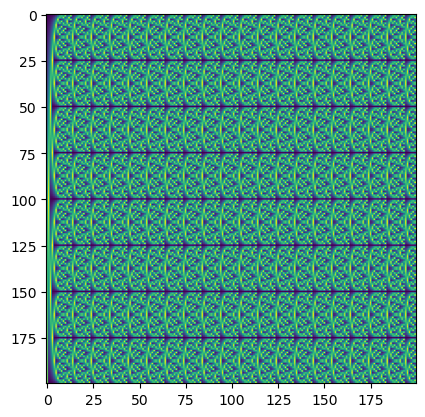

In [9]:
count = 200
plt.imshow([fmurationalseq(start=[x, count], n=count, mu=[2, 1]) for x in range(count)])
plt.show()

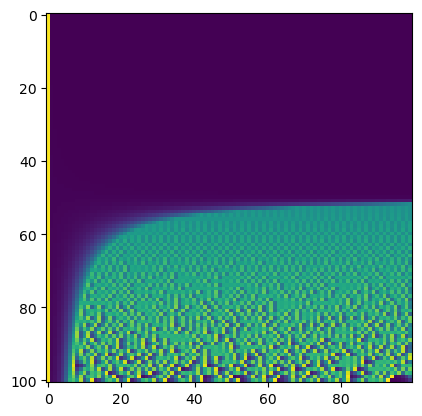

In [10]:
st = [99, 100]
count=100 # 144 and up causes overflow
plt.imshow([fmurationalseq(start=st, n=count, mu=[2*x, count]) for x in range(count+1)])
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


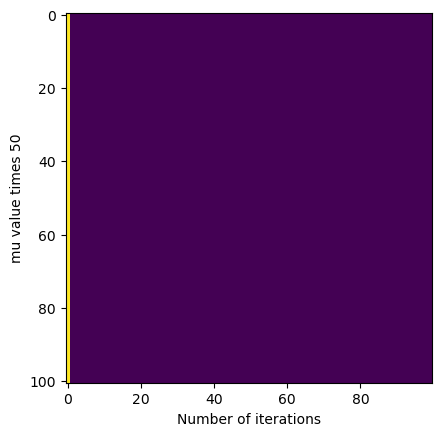

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("Number of iterations")
ax.set_ylabel("mu value times 50")
ims = []
for i in range(101):
  st = [i, 100]
  count=100 # 144 and up causes overflow
  im = ax.imshow([fmurationalseq(start=st, n=count, mu=[2*x, count]) for x in range(count+1)])
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save("mufig.gif")